In [1]:
%matplotlib inline

# Introduction

In this notebook, we aim to verify the derived correlation between flux and internal luminosity at 70 microns, first presented in section 3.2 of [Dunham _et. al._ (2008)](https://ui.adsabs.harvard.edu/abs/2008ApJS..179..249D/abstract). The motivation behind this work stems from the observation that the correlation was only derived for protostars whose envelopes' variable masses are between 1-10 solar masses, $$\begin{align*}1~\text{M}_\odot\leq M_\text{env}\leq10~\text{M}_\odot\end{align*}$$ implying that the study failed to consider protostars whose cores contain less than 1 solar mass. In other words, it was only tested for younger protostars whose mass distribution was still heavily centered around their surrounding envelopes. Hence, we propose to extend our considerations accordingly, to determine if the correlation still holds.

# Import Dependencies

In [2]:
# System & OS
import warnings
warnings.filterwarnings('ignore')

# Data Analysis
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt

# Utility Functions
from utils import *

# Mount Storage

First, `cd` to the `data/` directory.

In [3]:
%cd '../data/'

/Users/zach/Documents/Python/Protostellar-Luminosity/data


# Data Analysis

Then, read in our previous results.

In [27]:
coef = pd.read_csv('lin_coef.csv', skiprows=1, names=['Class', 
                                                      'Wavelength (microns)', 
                                                      'Slope', 
                                                      'Unc_slope', 
                                                      'Intercept', 
                                                      'Unc_intercept'])
coef

In [ ]:
corr = pd.read_csv('corr_coef.csv', skiprows=1, names=['Class', 
                                                       'Wavelength (microns)', 
                                                       'Reduced chi-squared (linear space)', 
                                                       'Reduced chi-squared (log10 space)', 
                                                       'Correlation coefficient (linear space)', 
                                                       'Correlation coefficient (log10 space)'])
corr

In [28]:
coef

,Class,Wavelength (microns),Slope,Unc_slope,Intercept,Unc_intercept
0,0,36000.29516661664,1.377430e-21,5.070542e-19,2.153766e-23,2.336238e-21
1,1a,36000.29516661664,6.191534e-23,3.774842e-19,9.385146e-25,1.078657e-21
2,1b,36000.29516661664,1.753754e-21,1.907709e-19,2.015349e-23,6.433861e-22
3,0 & 1,36000.29516661664,7.099818e-23,3.381002e-19,1.106404e-24,8.193271e-22
4,0,24000.196777744422,9.886612e-21,3.456221e-18,1.192601e-22,1.293641e-20
...,...,...,...,...,...,...
399,0 & 1,0.050000409953634216,8.795326e-18,1.399557e-15,5.391393e-19,4.715251e-16
400,0,All,1.384786e-10,-2.420337e-10,2.063053e-13,2.275860e-11
401,1,All,1.005031e-10,1.139198e-09,8.040971e-14,9.289510e-11
402,1,All,1.415745e-10,-2.686510e-11,8.771902e-14,2.817158e-12


In [29]:
# All wavelengths
coef.iloc[-4:, :]

,Class,Wavelength (microns),Slope,Unc_slope,Intercept,Unc_intercept
400,0,All,1.384786e-10,-2.420337e-10,2.063053e-13,2.275860e-11
401,1,All,1.005031e-10,1.139198e-09,8.040971e-14,9.289510e-11
402,1,All,1.415745e-10,-2.686510e-11,8.771902e-14,2.817158e-12
403,0 & 1,All,1.006698e-10,8.259329e-10,5.196467e-14,3.878544e-11


In [8]:
# All wavelengths
corr.loc[corr['Wavelength (microns)'] == 'All', 'Class':]

,Class,Wavelength (microns),Reduced chi-squared (linear space),Reduced chi-squared (log10 space),Correlation coefficient (linear space),Correlation coefficient (log10 space)


In [11]:
# Drop rows with Wavelength = All
coef = coef.iloc[:-4 , :]
corr = corr.iloc[:-4, :]
# Typecast wavelengths to float64
coef['Wavelength (microns)'] = coef['Wavelength (microns)'].apply(lambda x: float(x))
corr['Wavelength (microns)'] = corr['Wavelength (microns)'].apply(lambda x: float(x))

ValueError: could not convert string to float: ' All'

In [12]:
# ~70 microns
coef.loc[coef['Wavelength (microns)'] == 73.570602450168, :]

,Class,Wavelength (microns),Slope,Unc_slope,Intercept,Unc_intercept


In [13]:
# ~70 microns
corr.loc[corr['Wavelength (microns)'] == 73.570602450168, :]

,Class,Wavelength (microns),Reduced chi-squared (linear space),Reduced chi-squared (log10 space),Correlation coefficient (linear space),Correlation coefficient (log10 space)


In [14]:
# Extract rows with Class = 2
coef_2 = coef[coef['Class'] == '2']
corr_2 = corr[corr['Class'] == '2']
check_nan(corr_2)

Percentage of missing values in each column:

Class                                    NaN
Wavelength (microns)                     NaN
Reduced chi-squared (linear space)       NaN
Reduced chi-squared (log10 space)        NaN
Correlation coefficient (linear space)   NaN
Correlation coefficient (log10 space)    NaN
dtype: float64



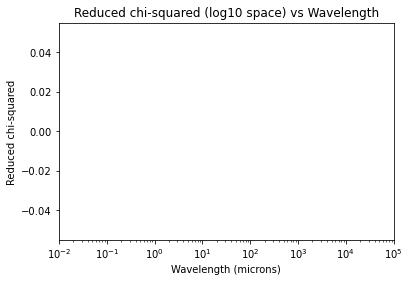

In [15]:
# Reduced chi-squared vs wavelength (log10 space)
plt.scatter(corr_2['Wavelength (microns)'], corr_2['Reduced chi-squared (log10 space)'], s=10)
plt.title('Reduced chi-squared (log10 space) vs Wavelength')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Reduced chi-squared')
plt.xscale('log')
plt.xlim(1e-2, 1e5)
plt.savefig(f'Figures/log10_rcs_vs_wavelength_full.jpg')
plt.show()

In [ ]:
# Reduced chi-squared vs wavelength (log10 space) with restricted y-axis
plt.scatter(corr_2['Wavelength (microns)'], corr_2['Reduced chi-squared (log10 space)'], s=10)
plt.title('Reduced chi-squared (log10 space) vs Wavelength')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Reduced chi-squared')
plt.xscale('log')
plt.xlim(1e-2, 1e5)
plt.ylim(-20000, 1000)
plt.legend(['Removed outliers'])
plt.savefig(f'Figures/log10_rcs_vs_wavelength_modified.jpg')
plt.show()

In [ ]:
# Reduced chi-squared vs wavelength (log10 space) with restricted y-axis
plt.scatter(corr_2['Wavelength (microns)'], corr_2['Reduced chi-squared (log10 space)'], s=10)
plt.title('Reduced chi-squared (log10 space) vs Wavelength')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Reduced chi-squared')
plt.xscale('log')
plt.xlim(1e-2, 1e5)
plt.ylim(-1000, 500)
plt.legend(['Removed outliers + Restricted y-axis'])
plt.savefig(f'Figures/log10_rcs_vs_wavelength_restricted.jpg')
plt.show()

In [ ]:
# Correlation coefficient vs wavelength (linear space)
plt.scatter(corr_2['Wavelength (microns)'], corr_2['Correlation coefficient (linear space)'], s=10)
plt.title('Correlation coefficient (linear space) vs Wavelength')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Correlation coefficient')
plt.xscale('log')
plt.xlim(1e-2, 1e5)
plt.savefig(f'Figures/linear_cc_vs_wavelength.jpg')
plt.show()

In [ ]:
# Correlation coefficient vs wavelength (log10 space)
plt.scatter(corr_2['Wavelength (microns)'], corr_2['Correlation coefficient (log10 space)'], s=10)
plt.title('Correlation coefficient (log10 space) vs Wavelength')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Correlation coefficient')
plt.xscale('log')
plt.xlim(1e-2, 1e5)
plt.savefig(f'Figures/log10_cc_vs_wavelength.jpg')
plt.show()

In [ ]:
for nclass in df['Class'].unique():
    # Extract model flux and internal luminosity data 
    flux = df.loc[(df['Class'] == nclass) & (df['Wavelength (microns)'] == 73.570602450168), 'Flux (erg cm^-2 s^-1)']
    lint = df.loc[(df['Class'] == nclass) & (df['Wavelength (microns)'] == 73.570602450168), 'L_int (Lsun)']

    # Zach's fit
    m = coef.loc[(coef['Class'] == '1a') & (coef['Wavelength (microns)'] == 73.570602450168), 'Slope'].values[0]
    b = coef.loc[(coef['Class'] == '1a') & (coef['Wavelength (microns)'] == 73.570602450168), 'Intercept'].values[0]
    zfit = 10**b * flux**m

    # Dunham's fit
    m = 1.06
    b = -9.02
    dfit = 10**b * flux**m

    # Make zfit vs lint plot
    plt.scatter(lint, zfit, s=10)
    plt.title('Expected Luminosity vs Observed Luminosity')
    plt.xlabel('Observed Luminosity (Lsun)')
    plt.ylabel('Expected Luminosity (Lsun)')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend([f'Class {nclass}, 70 microns - Yek (2022)'])
    plt.savefig(f'Figures/zfit_vs_lint_70microns_{nclass}.jpg')
    plt.clf()

    # Make dfit vs lint plot
    plt.scatter(lint, dfit, s=10)
    plt.title('Expected Luminosity vs Observed Luminosity')
    plt.xlabel('Observed Luminosity (Lsun)')
    plt.ylabel('Expected Luminosity (Lsun)')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend([f'Class {nclass}, 70 microns - Dunham (2008)'])
    plt.savefig(f'Figures/dfit_vs_lint_70microns_{nclass}.jpg')
    plt.clf()

    # Make dfit (normalized) vs zfit plot
    dfit = dfit / zfit
    plt.scatter(zfit, dfit, s=10)
    plt.title('Dunham (2008) vs Yek (2022)')
    plt.xlabel('Yek (2022)')
    plt.ylabel('Dunham (2008)')
    plt.xscale('log')
    plt.legend([f'Class {nclass}, 70 microns'])
    plt.savefig(f'Figures/dfit_normalized_vs_zfit_70microns_{nclass}.jpg')
    plt.clf()